<a href="https://colab.research.google.com/github/pratik-chakraborty10/ML_Projects/blob/main/Bigmart_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
big_mart_data = pd.read_csv('/content/Train.csv')

In [4]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
big_mart_data.shape

(8523, 12)

In [6]:
# checking null values in the dataset

big_mart_data.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [8]:
big_mart_data.describe() # only for numerical columns this describe() method is valid

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [10]:
# checking duplicate values -->whether each row is duplicated or not
big_mart_data.duplicated().any() # there is no duplicate rows in this dataset

False

In [13]:
# Handling missing values in numerical column -->univariate(mean,median,mode,constant,interpolation) or bivariate imputation(Regression,k-nearest)

mean_weight = big_mart_data['Item_Weight'].mean()
print(mean_weight)
median_weight = big_mart_data['Item_Weight'].median()
print(median_weight)


12.857645184135976
12.6


In [14]:
# filling missing values with mean & median
big_mart_data['Item_Weight_Mean']=big_mart_data['Item_Weight'].fillna(mean_weight) # creating new rows
big_mart_data['Item_Weight_Median']=big_mart_data['Item_Weight'].fillna(median_weight) #creating new rows

In [15]:
print('Original weight variance',big_mart_data['Item_Weight'].var())
print('Item weight variance after mean imputation',big_mart_data['Item_Weight_Mean'].var())
print('Item weight variance after median imputation',big_mart_data['Item_Weight_Median'].var())

Original weight variance 21.56168825983637
Item weight variance after mean imputation 17.860121735060453
Item weight variance after median imputation 17.869561454073366


<Axes: >

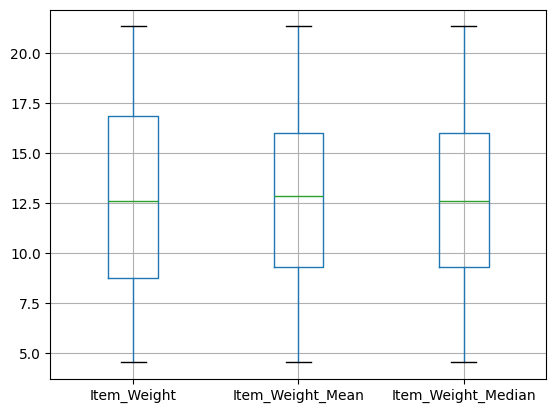

In [18]:
big_mart_data[['Item_Weight','Item_Weight_Mean','Item_Weight_Median']].boxplot() #checking spread of the data -->not desirable

In [19]:
# using interpolate method
big_mart_data['Item_Weight_interpolate']=big_mart_data['Item_Weight'].interpolate(method='linear')

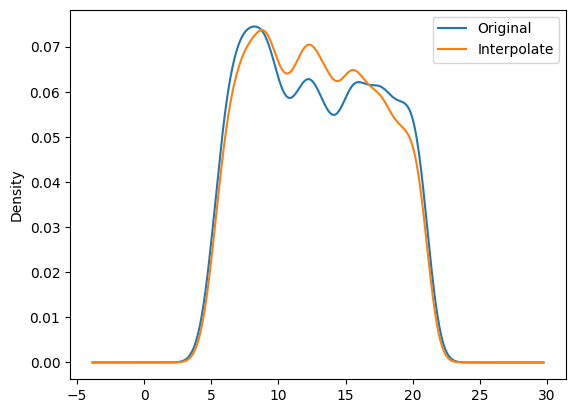

In [20]:
# orginal v/s after interpolation distribution check
big_mart_data['Item_Weight'].plot(kind='kde',label='Original')
big_mart_data['Item_Weight_interpolate'].plot(kind='kde',label='Interpolate')

plt.legend()
plt.show()



In [21]:
# MultiVariate imputation
from sklearn.impute import KNNImputer

In [23]:
knn = KNNImputer(n_neighbors=10,weights='distance')

In [24]:
big_mart_data['knn_imputer'] = knn.fit_transform(big_mart_data[['Item_Weight']]).ravel() # ravel()--->for handling errors

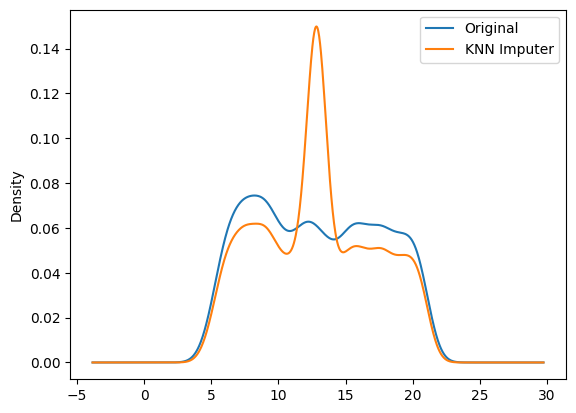

In [25]:
# original v/s after knn imputer applying on the data
big_mart_data['Item_Weight'].plot(kind='kde',label='Original')
big_mart_data['knn_imputer'].plot(kind='kde',label='KNN Imputer')

plt.legend()
plt.show()

In [26]:
# drop all the other columns because only interpolation method is best suits here
big_mart_data = big_mart_data.drop(['Item_Weight','Item_Weight_Mean','Item_Weight_Median','knn_imputer'],axis=1)

In [27]:
big_mart_data.head(1)

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interpolate
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,9.3


In [28]:
big_mart_data.isnull().sum()

,0
Item_Identifier,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0
Outlet_Type,0


In [29]:
# Handling missing values in categorical data -->'Outlet_Size'
big_mart_data['Outlet_Size'].value_counts()

,count
Outlet_Size,
Medium,2793
Small,2388
High,932


In [30]:
# going to fill missing values of 'outlet_size' on the basis of 'outlet_type'
big_mart_data['Outlet_Type'].value_counts()

,count
Outlet_Type,
Supermarket Type1,5577
Grocery Store,1083
Supermarket Type3,935
Supermarket Type2,928


In [34]:
# applying mode
mode_outlet = big_mart_data.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x : x.mode()[0]))
print(mode_outlet)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [36]:
missing_values = big_mart_data['Outlet_Size'].isnull()
missing_values

,Outlet_Size
0,False
1,False
2,False
3,True
4,False
...,...
8518,False
8519,True
8520,False
8521,False


In [38]:
# missing values handled successfully
big_mart_data.loc[missing_values,'Outlet_Size'] = big_mart_data.loc[missing_values,'Outlet_Type'].apply(lambda x: mode_outlet[x])

In [40]:
big_mart_data.isnull().sum() # all missing values are handled

,0
Item_Identifier,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0
Outlet_Type,0


In [41]:
big_mart_data.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Item_Weight_interpolate'],
      dtype='object')

In [43]:
big_mart_data['Item_Fat_Content'].value_counts() # Low Fat & LF,low fat are same ,Regular & reg both same

,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


In [48]:
# consistent labeling for all
big_mart_data.replace({'Item_Fat_Content':{'Low Fat':'LF','low fat':'LF','reg':'Regular','Regualr':'Regular'}},inplace=True)

In [49]:
big_mart_data['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
LF,5517
Regular,3006


In [51]:
# handling 0's as missing values -->here 526 zeros present
big_mart_data['Item_Visibility'].value_counts()

,count
Item_Visibility,
0.000000,526
0.076975,3
0.162462,2
0.076841,2
0.073562,2
...,...
0.013957,1
0.110460,1
0.124646,1


In [52]:
big_mart_data['Item_Visibility_interpolate'] = big_mart_data['Item_Visibility'].replace(0,np.nan).interpolate(method='linear')

In [53]:
big_mart_data.head(1)

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interpolate,Item_Visibility_interpolate
0,FDA15,LF,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,9.3,0.016047


In [54]:
big_mart_data['Item_Visibility_interpolate'].value_counts() #successfully handles zeros

,count
Item_Visibility_interpolate,
0.076975,3
0.044024,2
0.040912,2
0.076856,2
0.078759,2
...,...
0.021011,1
0.099189,1
0.076866,1


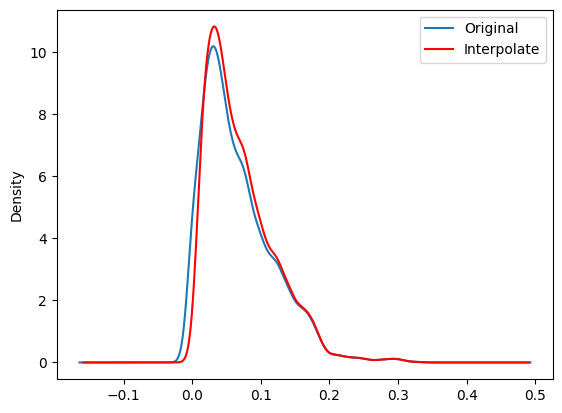

In [55]:
# original v/s after interpolation distribution show
big_mart_data['Item_Visibility'].plot(kind='kde',label='Original')
big_mart_data['Item_Visibility_interpolate'].plot(kind='kde',color='red',label='Interpolate')
plt.legend()
plt.show()

In [56]:
# dropping original column
big_mart_data = big_mart_data.drop('Item_Visibility',axis=1)


In [57]:
big_mart_data.head(1)

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interpolate,Item_Visibility_interpolate
0,FDA15,LF,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,9.3,0.016047


In [60]:
big_mart_data['Item_Identifier'].value_counts().sample(5) # category presents here

,count
Item_Identifier,
FDT48,6
NCP50,7
FDS36,6
FDO33,1
FDC33,6


In [61]:
big_mart_data['Item_Identifier'] = big_mart_data['Item_Identifier'].apply(lambda x:x[:2]) #extracting first two character of string

In [63]:
big_mart_data['Item_Identifier'].value_counts()

,count
Item_Identifier,
FD,6125
NC,1599
DR,799


In [66]:
# establishment year converts to age by difference with present year
import datetime as dt
curr_year = dt.datetime.today().year
curr_year




2024

In [68]:
# establishment year converts to age by difference with present year
big_mart_data['Outlet_Age'] = curr_year - big_mart_data['Outlet_Establishment_Year']

In [69]:
big_mart_data.head(1)

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interpolate,Item_Visibility_interpolate,Outlet_Age
0,FD,LF,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,9.3,0.016047,25


In [71]:
big_mart_data = big_mart_data.drop('Outlet_Establishment_Year',axis=1)

In [72]:
# Handling categorical columns using encoding because ml model only knows numeric values

# ordinal encoding use here

from sklearn.preprocessing import OrdinalEncoder

big_mart_data_encoded = big_mart_data.copy()

categorical_cols = big_mart_data.select_dtypes(include=['object']).columns

for col in categorical_cols:
  oe = OrdinalEncoder()
  big_mart_data_encoded[col] = oe.fit_transform(big_mart_data_encoded[[col]])
  print(oe.categories_)


[array(['DR', 'FD', 'NC'], dtype=object)]
[array(['LF', 'Regular'], dtype=object)]
[array(['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
       'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
       'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
       'Snack Foods', 'Soft Drinks', 'Starchy Foods'], dtype=object)]
[array(['OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027',
       'OUT035', 'OUT045', 'OUT046', 'OUT049'], dtype=object)]
[array(['High', 'Medium', 'Small'], dtype=object)]
[array(['Tier 1', 'Tier 2', 'Tier 3'], dtype=object)]
[array(['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3'], dtype=object)]


In [73]:
big_mart_data_encoded.head(1)

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interpolate,Item_Visibility_interpolate,Outlet_Age
0,1.0,0.0,4.0,249.8092,9.0,1.0,0.0,1.0,3735.138,9.3,0.016047,25


In [74]:
X = big_mart_data_encoded.drop('Item_Outlet_Sales',axis=1)
Y = big_mart_data_encoded['Item_Outlet_Sales']

In [75]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100,random_state=42)
scores = cross_val_score(rf,X,Y,cv=5,scoring='r2')
print(scores.mean())

0.555040442702387


In [76]:
# XGBRFRegressor
from xgboost import XGBRFRegressor
xg = XGBRFRegressor(n_estimators=100,random_state=42)
scores = cross_val_score(xg,X,Y,cv=5,scoring='r2')
print(scores.mean()) #this is the best model for this dataset

0.5955270459526943


In [77]:
# XGBRFRegressor Feature Importances
xg = XGBRFRegressor(n_estimators=100,random_state=42)

xg1 = xg.fit(X,Y)
pd.DataFrame({
    'feature' : X.columns,
    'XGBRF_importance': xg1.feature_importances_
}).sort_values(by='XGBRF_importance',ascending=False)

,feature,XGBRF_importance
7,Outlet_Type,0.428726
10,Outlet_Age,0.154613
3,Item_MRP,0.143704
5,Outlet_Size,0.136857
4,Outlet_Identifier,0.118608
6,Outlet_Location_Type,0.008615
9,Item_Visibility_interpolate,0.002940
8,Item_Weight_interpolate,0.002302
2,Item_Type,0.001865
0,Item_Identifier,0.001068


In [78]:
['Item_Visibility_interpolate','Item_Weight_interploate',
'Item_Type','Outlet_Location_Type','Item_Identifier','Item_Fat_Content']

['Item_Visibility_interpolate',
 'Item_Weight_interploate',
 'Item_Type',
 'Outlet_Location_Type',
 'Item_Identifier',
 'Item_Fat_Content']

In [82]:
from xgboost import XGBRFRegressor

xg = XGBRFRegressor(n_estimators=100,random_state=42)
scores = cross_val_score(xg1,X.drop(['Item_Visibility_interpolate','Item_Weight_interpolate',
'Item_Type','Outlet_Location_Type','Item_Identifier','Item_Fat_Content'],axis=1),Y,cv=5,scoring='r2')
print(scores.mean()) # after removing some cols our r2 score increases because we only fetching the feature importances

0.5961723971108985


In [84]:
final_data = X.drop(columns=['Item_Visibility_interpolate','Item_Weight_interpolate',
'Item_Type','Outlet_Location_Type','Item_Identifier','Item_Fat_Content'],axis=1)

In [85]:
final_data

,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Type,Outlet_Age
0,249.8092,9.0,1.0,1.0,25
1,48.2692,3.0,1.0,2.0,15
2,141.6180,9.0,1.0,1.0,25
3,182.0950,0.0,2.0,0.0,26
4,53.8614,1.0,0.0,1.0,37
...,...,...,...,...,...
8518,214.5218,1.0,0.0,1.0,37
8519,108.1570,7.0,2.0,1.0,22
8520,85.1224,6.0,2.0,1.0,20
8521,103.1332,3.0,1.0,2.0,15


In [87]:
from xgboost import XGBRFRegressor
xg_final = XGBRFRegressor()
xg_final.fit(final_data,Y)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error


In [89]:
X_train,X_test,Y_train,Y_test = train_test_split(final_data,Y,
                                                 test_size=0.20,
                                                 random_state=42)

In [90]:
xg_final.fit(X_train,Y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [91]:
Y_pred = xg_final.predict(X_test)

In [92]:
mean_absolute_error(Y_test,Y_pred)

714.5479888800818

In [93]:
pred = xg_final.predict(np.array([[141.6180,9.0,1.0,1.0,24]]))[0]
print(pred) #prediction on unseen data

2049.1736


Save Model Using Joblib

In [94]:
import joblib

In [95]:
joblib.dump(xg_final,'bigmart_model')

['bigmart_model']

In [96]:
model = joblib.load('bigmart_model')

In [97]:
pred = model.predict(np.array([[141.6180,9.0,1.0,1.0,24]]))[0]
print(pred)

2049.1736


GUI

In [100]:
import numpy as np
import datetime as dt
import joblib
import ipywidgets as widgets
from IPython.display import display

# Get the current year
current_year = dt.datetime.today().year

# Function to handle prediction
def predict_sales(p1, p2, p3, p4, p5):
    model = joblib.load('bigmart_model')  # Ensure the model path is correct
    result = model.predict(np.array([[p1, p2, p3, p4, p5]]))
    display(f"Sales Amount is between: {float(result) - 714.42} and {float(result) + 714.42}")
    print("Sales amount", result)

# Dropdowns for selection
outlet_options = ['OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027', 'OUT035', 'OUT045', 'OUT046', 'OUT049']
size_options = ['High', 'Medium', 'Small']
type_options = ['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3']

# Widgets for user input
item_mrp_widget = widgets.FloatText(description="Item_MRP")
outlet_widget = widgets.Dropdown(description="Outlet_Identifier", options=outlet_options)
size_widget = widgets.Dropdown(description="Outlet_Size", options=size_options)
type_widget = widgets.Dropdown(description="Outlet_Type", options=type_options)
establishment_year_widget = widgets.IntText(description="Outlet_Establishment_Year", value=current_year)

# Button to trigger prediction
predict_button = widgets.Button(description="Predict")
def on_predict_button_clicked(b):
    p1 = item_mrp_widget.value
    p2 = outlet_options.index(outlet_widget.value)
    p3 = size_options.index(size_widget.value)
    p4 = type_options.index(type_widget.value)
    p5 = current_year - establishment_year_widget.value
    predict_sales(p1, p2, p3, p4, p5)

predict_button.on_click(on_predict_button_clicked)

# Display widgets
display(item_mrp_widget, outlet_widget, size_widget, type_widget, establishment_year_widget, predict_button)


FloatText(value=0.0, description='Item_MRP')

Dropdown(description='Outlet_Identifier', options=('OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027',…

Dropdown(description='Outlet_Size', options=('High', 'Medium', 'Small'), value='High')

Dropdown(description='Outlet_Type', options=('Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Super…

IntText(value=2024, description='Outlet_Establishment_Year')

Button(description='Predict', style=ButtonStyle())

'Sales Amount is between: -119.19746582031246 and 1309.6425341796876'

Sales amount [595.22253]
